In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv("amazon_reviews_sample.csv.xls")
print(df.head())

   Unnamed: 0  score                                             review
0           0      1   Stuning even for the non-gamer: This sound tr...
1           1      1   The best soundtrack ever to anything.: I'm re...
2           2      1   Amazing!: This soundtrack is my favorite musi...
3           3      1   Excellent Soundtrack: I truly like this sound...
4           4      1   Remember, Pull Your Jaw Off The Floor After H...


In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
# Inisialisasi alat
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Hapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Hapus mention dan hashtag
    text = re.sub(r'\@w+|\#', '', text)

    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenisasi
    tokens = nltk.word_tokenize(text)

    # Hapus stopword dan lakukan lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Gabungkan kembali menjadi string
    return " ".join(cleaned_tokens)

df['cleaned_review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
print(df.head())

   Unnamed: 0  score                                             review  \
0           0      1   Stuning even for the non-gamer: This sound tr...   
1           1      1   The best soundtrack ever to anything.: I'm re...   
2           2      1   Amazing!: This soundtrack is my favorite musi...   
3           3      1   Excellent Soundtrack: I truly like this sound...   
4           4      1   Remember, Pull Your Jaw Off The Floor After H...   

                                      cleaned_review  
0  stuning even nongamer sound track beautiful pa...  
1  best soundtrack ever anything im reading lot r...  
2  amazing soundtrack favorite music time hand in...  
3  excellent soundtrack truly like soundtrack enj...  
4  remember pull jaw floor hearing youve played g...  


In [4]:
df.drop('review', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.rename(columns={'cleaned_review': 'review'}, inplace=True)
print(df.head())

   score                                             review
0      1  stuning even nongamer sound track beautiful pa...
1      1  best soundtrack ever anything im reading lot r...
2      1  amazing soundtrack favorite music time hand in...
3      1  excellent soundtrack truly like soundtrack enj...
4      1  remember pull jaw floor hearing youve played g...


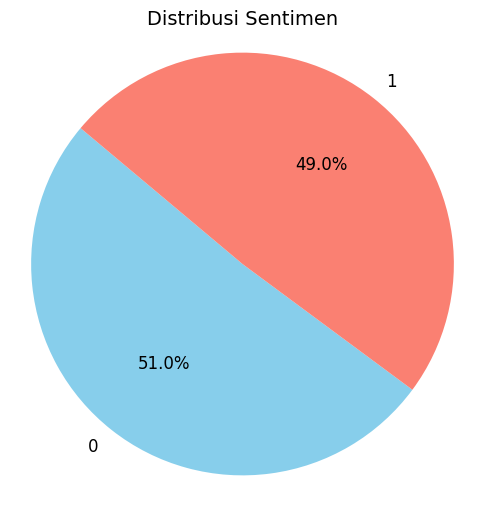

In [5]:
label_counts = df['score'].value_counts()
label_percentages = df['score'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'salmon'], startangle=140, textprops={'fontsize': 12})
plt.title("Distribusi Sentimen", fontsize=14)
plt.axis('equal')  # agar lingkaran sempurna
plt.show()

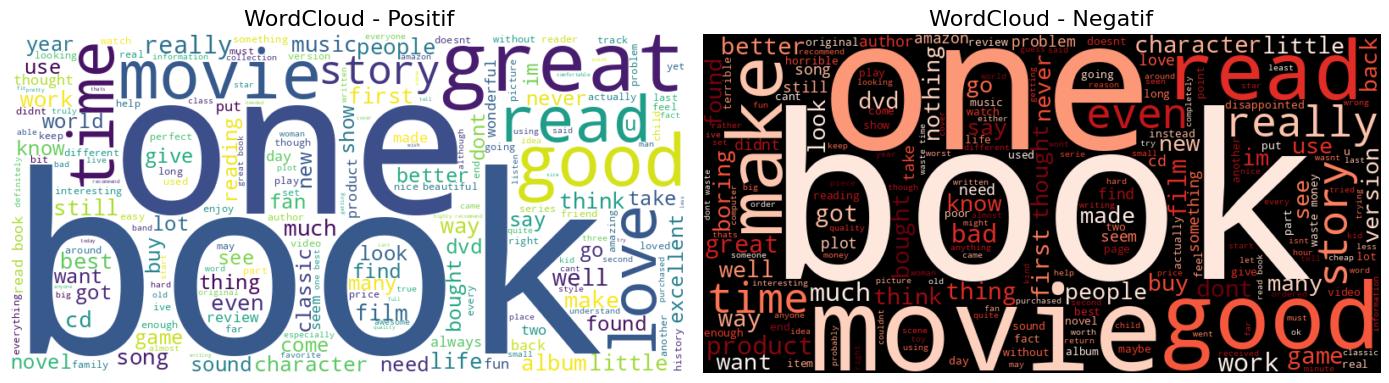

In [6]:
#wordcloud
!pip install wordcloud
from wordcloud import WordCloud

positive_text = " ".join(df[df['score'] == 1]['review'])
negative_text = " ".join(df[df['score'] == 0]['review'])

# Buat wordcloud untuk review positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Buat wordcloud untuk review negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Tampilkan kedua wordcloud
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("WordCloud - Positif", fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("WordCloud - Negatif", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

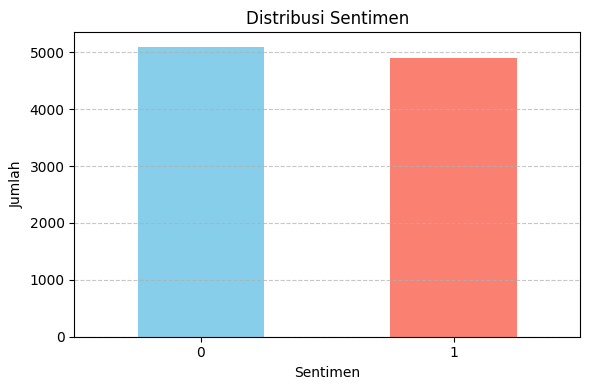

In [7]:
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [9]:
# Pisahkan fitur dan label
X = df['review']
y = df['score']

# Split data: 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cetak beberapa data
print("Data Latih:")
print(X_train.head(), "\n")
print("Data Uji:")
print(X_test.head())


Data Latih:
9254    nutritious delicious though one reviewer felt ...
1561    case anyone stupid may best product wouldnt kn...
1670    simply elegance one item keep loving year year...
6087    warning argento asleep wheel film lack element...
6669    powerful account everest ever read time world ...
Name: review, dtype: object 

Data Uji:
6252    know im minority im sorry spoilsport found ter...
4684    disappointing 4th clavell book ive read little...
1731    writing good plot need lot work love book make...
4742    good little sure thing definitely costeffectiv...
4521    great first timer flexability nice us non stan...
Name: review, dtype: object


In [10]:
# Inisialisasi TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

# Fit dan transform data latih
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform data uji
X_test_tfidf = vectorizer.transform(X_test)


In [11]:
# Inisialisasi model
model = LogisticRegression()

# Latih model
model.fit(X_train_tfidf, y_train)

# Model siap digunakan
print("Model berhasil dilatih.")


Model berhasil dilatih.


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns



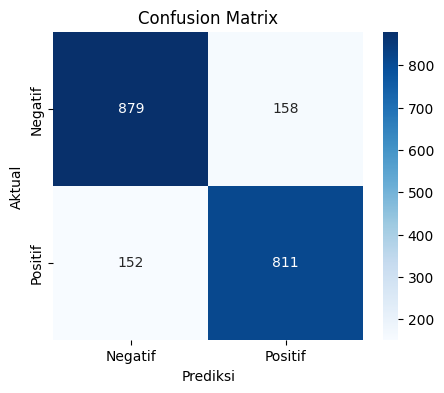

Accuracy: 84.5 %

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1037
           1       0.84      0.84      0.84       963

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.84      0.85      2000



In [13]:
# Prediksi data uji
y_pred = model.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Tampilkan Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan metrik lainnya
print("Accuracy:", round(acc * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [14]:
# Contoh input
input_text = "The plot was boring and I fell asleep."

# Preprocessing sama seperti sebelumnya
input_vector = vectorizer.transform([input_text])  # vektorisasi

# Prediksi
prediction = model.predict(input_vector)[0]
# Mapping angka ke label sentimen
label_map = {1: 'Positive', 0: 'Negative'}

# Cetak hasil prediksi
print("Prediksi Sentimen:", label_map[prediction])


Prediksi Sentimen: Negative


In [15]:
import joblib

joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']